# Read the data

In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./Reservations_and_Pizzas.csv')
reservations = df['Reservations'].to_numpy(dtype='float64')
pizzas = df['Pizzas'].to_numpy(dtype='float64')

In [4]:
reservations

array([ 1.,  2.,  2.,  3.,  5.,  6.,  6.,  7.,  8.,  9., 10., 10., 10.,
       12., 12., 13., 13., 14., 15., 15., 18., 18., 21., 21., 22., 23.,
       26., 26., 27.])

In [5]:
pizzas

array([16., 13., 16., 15., 17., 16., 18., 22., 23., 26., 17., 21., 27.,
       25., 27., 23., 33., 32., 30., 39., 34., 37., 32., 37., 37., 51.,
       29., 34., 44.])

# Visualization of the current data

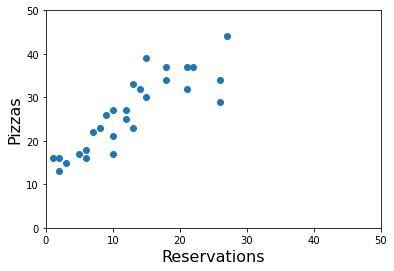

In [5]:
plt.xlabel('Reservations', fontsize=16)
plt.ylabel('Pizzas', fontsize=16)
plt.axis([0,50,0,50])
plt.plot(reservations, pizzas, "o")
plt.show()

# Predictions

In [6]:
def predict(reservations, m, b):
    return reservations * m + b

In [7]:
# Testing that prediction works
# based in example parameters
predict(14, 1.2, 12)

28.8

### The term "Broadcasting" is an stardard in numpy and it refers to the 
### ability of work with arrays of different shapes in arithmetic operations.

In [8]:
reservationsBroadcast = np.array([14,5,7])
predictions = predict(reservationsBroadcast, 1.2, 12)
predictions

array([28.8, 18. , 20.4])

# Loss 

In [9]:
def loss(x, y, m, b):
    predictions = predict(x, m, b)
    return np.average((predictions - y) ** 2)

In [10]:
loss(reservations, pizzas, 1.2, 12)

24.420689655172428

# Training 

In [11]:
def train(x, y, iterations, learningRate):
    w = b = 0
    for i in range(iterations):
        current_loss = loss(x, y, w, b)
        print('Iteration %4d => Loss %.6f' % (i, current_loss))
        if loss(x, y, w - learningRate, b) < current_loss:
            w -= learningRate
        if loss(x, y, w + learningRate, b) < current_loss:
            w += learningRate
        if loss(x, y, w, b - learningRate) < current_loss:
            b -= learningRate
        if loss(x, y, w, b + learningRate) < current_loss:
            b += learningRate
        else:
            return w, b
    raise Exception('Couldn\'t find a result withing %d iterations' % iterations)
    

In [12]:
w, b = train(reservations, pizzas, 10000, 0.01)

Iteration    0 => Loss 833.137931
Iteration    1 => Loss 824.881052
Iteration    2 => Loss 816.669034
Iteration    3 => Loss 808.501879
Iteration    4 => Loss 800.379586
Iteration    5 => Loss 792.302155
Iteration    6 => Loss 784.269586
Iteration    7 => Loss 776.281879
Iteration    8 => Loss 768.339034
Iteration    9 => Loss 760.441052
Iteration   10 => Loss 752.587931
Iteration   11 => Loss 744.779672
Iteration   12 => Loss 737.016276
Iteration   13 => Loss 729.297741
Iteration   14 => Loss 721.624069
Iteration   15 => Loss 713.995259
Iteration   16 => Loss 706.411310
Iteration   17 => Loss 698.872224
Iteration   18 => Loss 691.378000
Iteration   19 => Loss 683.928638
Iteration   20 => Loss 676.524138
Iteration   21 => Loss 669.164500
Iteration   22 => Loss 661.849724
Iteration   23 => Loss 654.579810
Iteration   24 => Loss 647.354759
Iteration   25 => Loss 640.174569
Iteration   26 => Loss 633.039241
Iteration   27 => Loss 625.948776
Iteration   28 => Loss 618.903172
Iteration   29

# Visualization of the data with the linear modeling

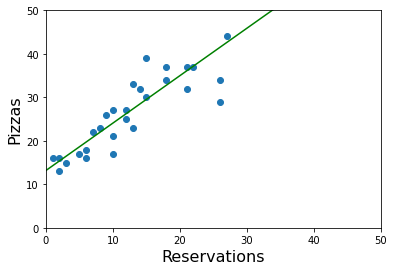

In [13]:
plt.xlabel('Reservations', fontsize=16)
plt.ylabel('Pizzas', fontsize=16)
plt.axis([0,50,0,50])
plt.plot(reservations, pizzas, "o")
plt.plot([0, 50], [b, predict(50, w, b)], color='g')
plt.show()

# Testing

In [14]:
reservations = 59
predict(reservations, w, b)

77.48999999999981